In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import streamlit as st
from sqlalchemy import create_engine, MetaData
from sqlalchemy_schemadisplay import create_schema_graph
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Database Configuration
db_name='classicmodels'

DB_CONFIG = {
    "host": "localhost",
    "user": "root",
    "password": "admin",
    "database": db_name,
}
# Fetch Data
conn = mysql.connector.connect(**DB_CONFIG)

query = "SHOW TABLES;"
cursor = conn.cursor()
cursor.execute(query)
tables = cursor.fetchall()
print(tables)


query = "SELECT * FROM products;"
df = pd.read_sql(query, conn)

conn.close()


save_path='schema.png'

[('customers',), ('employees',), ('offices',), ('orderdetails',), ('orders',), ('payments',), ('productlines',), ('products',)]


C:\Users\Shera\AppData\Local\Temp\ipykernel_40392\1305371290.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [3]:
df

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00
...,...,...,...,...,...,...,...,...,...
105,S700_3505,The Titanic,Ships,1:700,Carousel DieCast Legends,"Completed model measures 19 1/2 inches long, 9...",1956,51.09,100.17
106,S700_3962,The Queen Mary,Ships,1:700,Welly Diecast Productions,Exact replica. Wood and Metal. Many extras inc...,5088,53.63,99.31
107,S700_4002,American Airlines: MD-11S,Planes,1:700,Second Gear Diecast,Polished finish. Exact replia with official lo...,8820,36.27,74.03
108,S72_1253,Boeing X-32A JSF,Planes,1:72,Motor City Art Classics,"10"" Wingspan with retractable landing gears.Co...",4857,32.77,49.66


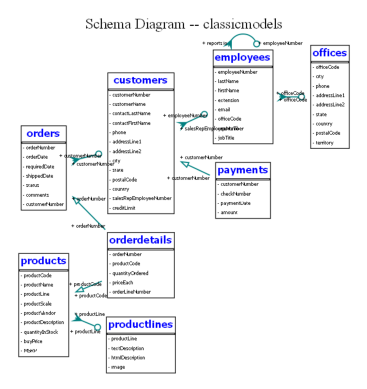

In [4]:
# Create a connection string
connection_string = f"mysql+pymysql://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}/{DB_CONFIG['database']}"
engine = create_engine(connection_string)

metadata = MetaData()
metadata.reflect(bind=engine)

# Define styling options
relation_options = {
    "color": "#008080",  # Foreign key relationship lines
    "penwidth": "1.5"
}

format_table_name = {
    "color": "blue",  # Green table name text
    "fontsize": 14,
    "bold": True
}
format_table = {
    "color": "green",  # Green color for table boxes
    "style": "filled",
    "fillcolor": "green"
}

# Generate the schema graph with styling
graph = create_schema_graph(metadata=metadata,
                            engine=engine,
                            show_datatypes=False,
                            show_indexes=False,
                            rankdir='LR',
                            concentrate=True,
                            relation_options=relation_options,
                            format_table_name=format_table_name)




# hardcoded_label = """<<TABLE BORDER="1" CELLBORDER="1" CELLSPACING="1" BGCOLOR="green">
#     <TR><TD ALIGN="CENTER" BGCOLOR="white"><FONT COLOR="blue" POINT-SIZE="14.0"><B>customers</B></FONT></TD></TR>
#     <TR><TD BORDER="1" CELLPADDING="0" BGCOLOR="white"></TD></TR>
#     <TR><TD ALIGN="LEFT" PORT="customerNumber" BGCOLOR="white">- customerNumber</TD></TR>
#     <TR><TD ALIGN="LEFT" PORT="customerName" BGCOLOR="white">- customerName</TD></TR>
#     <TR><TD ALIGN="LEFT" PORT="contactLastName" BGCOLOR="white">- contactLastName</TD></TR>
#     <TR><TD ALIGN="LEFT" PORT="contactFirstName" BGCOLOR="white">- contactFirstName</TD></TR>
#     <TR><TD ALIGN="LEFT" PORT="phone" BGCOLOR="white">- phone</TD></TR>
#     <TR><TD ALIGN="LEFT" PORT="addressLine1" BGCOLOR="white">- addressLine1</TD></TR>
#     <TR><TD ALIGN="LEFT" PORT="addressLine2" BGCOLOR="white">- addressLine2</TD></TR>
#     <TR><TD ALIGN="LEFT" PORT="city" BGCOLOR="white">- city</TD></TR>
#     <TR><TD ALIGN="LEFT" PORT="state" BGCOLOR="white">- state</TD></TR>
#     <TR><TD ALIGN="LEFT" PORT="postalCode" BGCOLOR="white">- postalCode</TD></TR>
#     <TR><TD ALIGN="LEFT" PORT="country" BGCOLOR="white">- country</TD></TR>
#     <TR><TD ALIGN="LEFT" PORT="salesRepEmployeeNumber" BGCOLOR="white">- salesRepEmployeeNumber</TD></TR>
#     <TR><TD ALIGN="LEFT" PORT="creditLimit" BGCOLOR="white">- creditLimit</TD></TR>
# </TABLE>>"""

# for node in graph.get_node_list():
#     label = node.get_label()
#     print(label.type)
#     node.set_label(hardcoded_label)
#     break




graph.set("label",  "Schema Diagram -- "+ db_name) 
graph.set("fontsize", "20")  
graph.set("labelloc", "t")  
graph.set("fontcolor", "black")




graph.write_png(save_path)

plt.imshow(mpimg.imread(save_path))
plt.axis('off')  # Hide the axes
plt.show()

